In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

We're using an alias, "soup," to simplify our code a bit when we reference it later.

Next, we'll set the executable path and initialize a browser:

In [3]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/lucypepe/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


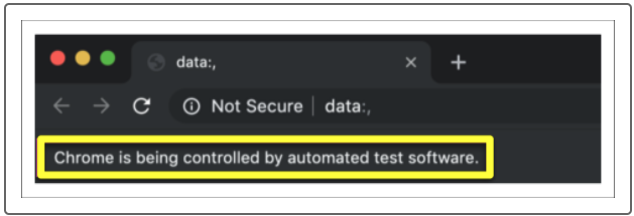

## Scrape the Title

In [4]:
# Visit the Quotes to Scrape site
url ='http://quotes.toscrape.com/'
browser.visit(url)

This code tells Splinter which site we want to visit by assigning the link to a URL. After executing the cell above, we will use BeautifulSoup to parse the HTML. In the next cell, we'll add two more lines of code:

In [5]:
# Parse the HTML
html = browser.html
html_soup = soup(html, 'html.parser')

Now we've parsed all of the HTML on the page. That means that BeautifulSoup has taken a look at the different components and can now access them. Specifically, BeautifulSoup parses the HTML text and then stores it as an object.

In our code, we're using ‘html.parser’ to parse the information, but there are other options available as well.

In our next cell, we will find the title and extract it.

In [6]:
# Scrape the Title
title = html_soup.find('h2').text
title

'Top Ten tags'

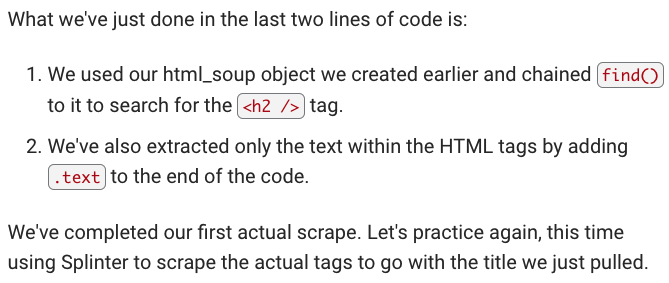

In [7]:
# Scrape the top ten tags
tag_box = html_soup.find('div', class_='tags-box')

#tag_box
tags = tag_box.find_all('a', class_='tag')

for tag in tags:
    word= tag.text
    print(word)

love
inspirational
life
humor
books
reading
friendship
friends
truth
simile


## Scrape Across Pages

In [8]:
url = 'http://quotes.toscrape.com/'
browser.visit(url)

In the next cell, we'll create a for loop that will do the following:

1. Create a BeautifulSoup object
2. Find all the quotes on the page
3. Print each quote from the page
4. Click the "Next" button at the bottom of the page

We'll use range(1, 6) in our for loop to visit the first five pages of the website.

In [9]:
for x in range(1, 6):
    html = browser.html
    quote_soup = soup(html, 'html.parser')
    quotes = quote_soup. find_all('span', class_='text')
    for quote in quotes:
        print('page:', x, '----------')
        print(quote.text)
    browser.links.find_by_partial_text('Next').click()

page: 1 ----------
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
page: 1 ----------
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
page: 1 ----------
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
page: 1 ----------
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
page: 1 ----------
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
page: 1 ----------
“Try not to become a man of success. Rather become a man of value.”
page: 1 ----------
“It is better to be hated for what you are than to be loved for what you are not.”
page: 1 ----------
“I have not failed. I've just found 10,000 ways that won't work.”
page: 1 ----------
“A woman is like a tea bag; you never know how strong it is u

# Skill Drill

Stretch your scraping skills by visiting Books to Scrape (Links to an external site.) and scraping the book URL list on the first page.

In [12]:
url ='http://books.toscrape.com/'
browser.visit(url)

In [13]:
html = browser.html
html_soup = soup(html, 'html.parser')

In [15]:
book = html_soup.find('a').text
book

'Books to Scrape'